<a href="https://colab.research.google.com/github/bhanukad610/Fare-Classification/blob/master/Fare_Classification_with_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/drive/My Drive/Semester 7/ML/Project/Data/train.csv')
df['label'].replace(to_replace=['correct','incorrect'], value=[1,0],inplace=True)
df.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,1


In [0]:
import numpy as np
from sklearn.impute import SimpleImputer

def naImputation(Features, column_names):
  # df.replace(np.NaN,np.NaN,inplace=True)
  imp=SimpleImputer(missing_values=np.NaN)
  idf=pd.DataFrame(imp.fit_transform(Features))
  idf.columns=Features.columns
  idf.index=Features.index

  for column_name in column_names:
    idf[column_name].isna().sum()

  
  return idf

In [0]:
from math import radians, sin, cos, acos

#function to calculte distance from lat and longs
def calculateDistance(pick_lat,pick_lon, drop_lat, drop_lon):
      pick_lat = radians(float(pick_lat))
      pick_lon = radians(float(pick_lon))
      drop_lat = radians(float(drop_lat))
      drop_lon = radians(float(drop_lon))

      if (pick_lon == drop_lon):
        distance = 0.0
        return round(distance, 2)
      else:
        distance = 6371.01 * acos(sin(pick_lat)*sin(drop_lat) + cos(pick_lat)*cos(drop_lat)*cos(pick_lon - drop_lon))

      # distance = 6371.01 * acos(sin(pick_lat)*sin(drop_lat) + cos(pick_lat)*cos(drop_lat)*cos(pick_lon - drop_lon))
      return round(distance, 2)

def calculateDistanceDf(pick_lat_frame,pick_lon_frame, drop_lat_frame, drop_lon_frame, distancedf):
  for i in range(len(drop_lon_frame)):
    pick_lat = pick_lat_frame[i]
    pick_lon = pick_lon_frame[i]
    drop_lat = drop_lat_frame[i]
    drop_lon = drop_lon_frame[i]

    try:
      distance = calculateDistance(pick_lat,pick_lon, drop_lat, drop_lon)
    except:
      print("Error occured! , at", i)

    distancedf[i] = distance

In [0]:
def preprocess(df, features):
  Features_to_calculate_distance = df[features_to_calculate_distance]
  Features_to_calculate_distance = naImputation(Features_to_calculate_distance, features_to_calculate_distance)
  
  distancedf = df['distance']
  distancedf = calculateDistanceDf(df['pick_lat'], df['pick_lon'], df['drop_lat'], df['drop_lon'], distancedf)

  
  features.append('distance')
  print(features)
  Features = df[features]
  Features = naImputation(Features,features)
  return Features

In [0]:
df = pd.read_csv('/content/drive/My Drive/Semester 7/ML/Project/Data/train.csv')
df['label'].replace(to_replace=['correct','incorrect'], value=[1,0],inplace=True)
df['distance'] = df['drop_lat']
features = ['additional_fare','duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup', 'fare']
features_to_calculate_distance = ['pick_lat','pick_lon', 'drop_lat', 'drop_lon']

In [0]:
Features = preprocess(df, features)
Features.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup', 'fare', 'distance']


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,distance
0,10.500000,834.000000,56.000000,0.000000,64.000000,270.32,5.09
1,10.500000,791.000000,47.000000,0.000000,134.000000,197.85,3.17
2,10.500000,1087.000000,80.000000,0.000000,61.000000,301.64,6.31
3,10.500000,598.000000,271.000000,15.663800,68.000000,82.30,0.86
4,13.719651,1702.858077,629.074231,32.057666,112.466832,358.39,8.15


KeyError: ignored

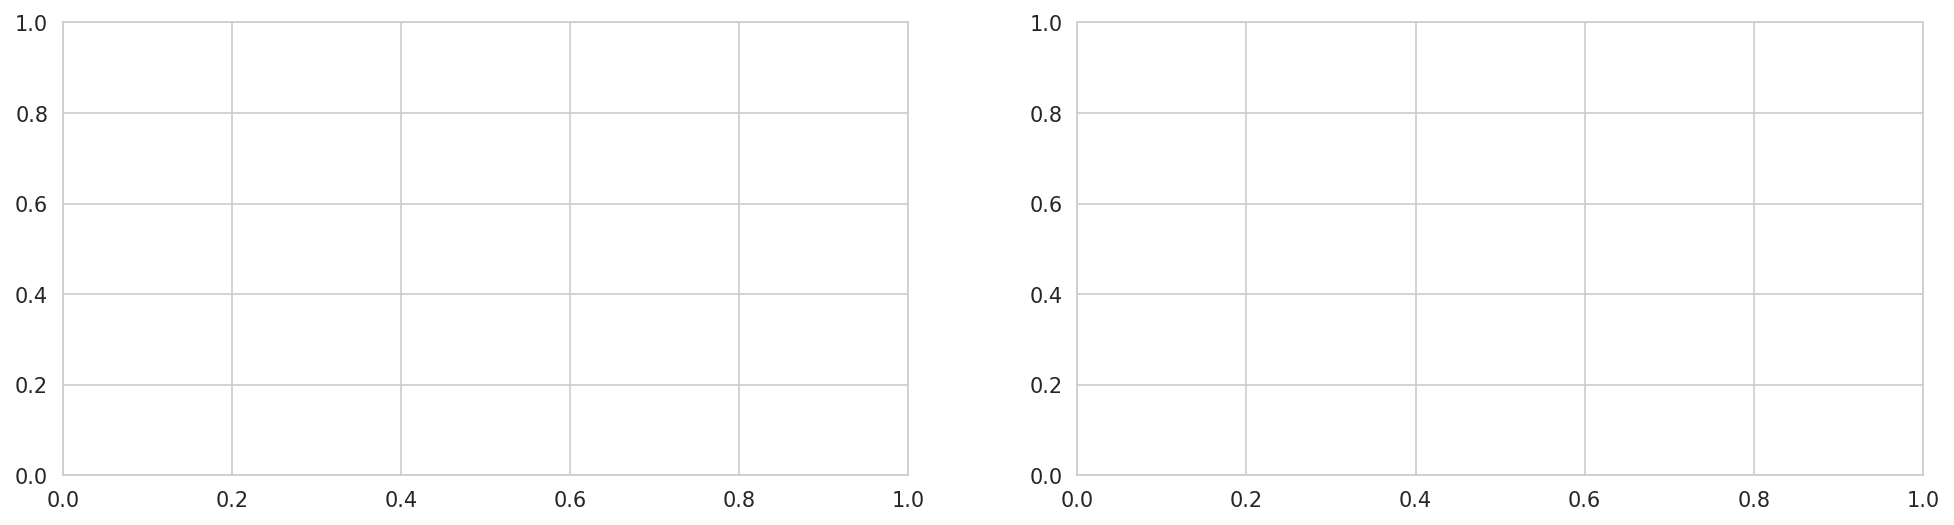

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
ax = sns.distplot(Features[Features['label']==1].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(Features[Features['label']==0].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')